# Anomaly Detection in Power Distribution Networks: A Comparative study of Classifiers

In [5]:
# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from lightgbm import LGBMClassifier
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
# Importing Dataset

In [8]:
dataset=pd.read_csv("Data.csv")

In [9]:
dataset=dataset.dropna()

In [10]:
dataset.isnull().sum()

R1-PA1:VH    0
R1-PM1:V     0
R1-PA2:VH    0
R1-PM2:V     0
R1-PA3:VH    0
            ..
R4:DF        0
R4-PA:Z      0
R4-PA:ZH     0
R4:S         0
marker       0
Length: 117, dtype: int64

In [11]:
dataset.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0,1
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0,1
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,125.277222,10.25416,-95.970431,10.07105,60.005,0.00,8.162755,0.026663,0,1
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,126.474704,9.33861,-97.253856,9.15550,60.003,0.00,8.135292,0.026595,0,1
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,126.595025,7.32440,-101.711468,7.14129,60.001,0.00,8.036023,0.033641,0,1


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123932 entries, 0 to 123931
Columns: 117 entries, R1-PA1:VH to marker
dtypes: float64(112), int64(5)
memory usage: 111.6 MB


In [13]:
dataset.isnull().sum()

R1-PA1:VH    0
R1-PM1:V     0
R1-PA2:VH    0
R1-PM2:V     0
R1-PA3:VH    0
            ..
R4:DF        0
R4-PA:Z      0
R4-PA:ZH     0
R4:S         0
marker       0
Length: 117, dtype: int64

In [14]:
dataset.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,marker
count,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,...,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000,123932.000000
mean,-14.977205,131249.592357,1.709784,131332.733193,5.333622,131706.051832,-14.269147,389.689860,3.065271,387.242895,...,-1.912321,8.051293,5.350668,7.523892,59.997963,0.000229,11.142852,0.013494,823.571442,0.488348
std,101.678435,5925.736741,110.858339,1879.905104,97.850191,1956.538293,101.905836,129.996342,110.747291,85.883230,...,68.564931,37.903934,72.896570,37.219688,0.067417,0.064458,43.772272,0.186560,14887.559266,0.499866
min,-179.988962,11834.583440,-179.994691,11383.264580,-179.994691,11433.411120,-179.994691,0.000000,-179.994691,0.000000,...,-179.997259,0.000000,-179.997259,0.000000,57.064999,-3.460000,0.187788,-3.093717,0.000000,0.000000
25%,-101.573958,131108.128800,-101.797411,130782.176300,-71.006660,131183.348600,-101.516662,314.766090,-98.233614,320.076280,...,0.000000,0.000000,0.000000,0.000000,59.999001,0.000000,8.470351,-0.029925,0.000000,0.000000
50%,-27.381653,131684.814000,6.898412,131358.861500,9.668663,131734.960600,-27.080850,380.868800,9.545477,385.629660,...,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,10.113741,0.017118,0.000000,0.000000
75%,69.780530,132136.132900,102.860248,131810.180400,85.330604,132186.279400,70.160114,451.732370,103.596499,455.394570,...,0.000000,7.003784,10.329895,6.958180,60.000000,0.000000,12.418418,0.054662,0.000000,1.000000
max,179.994691,146452.970100,179.994691,145750.918500,179.988962,146528.189900,179.988962,1779.462980,179.994691,1187.651460,...,179.977503,610.038757,179.977503,715.827942,62.226000,2.360000,10359.488510,3.106656,270336.000000,1.000000


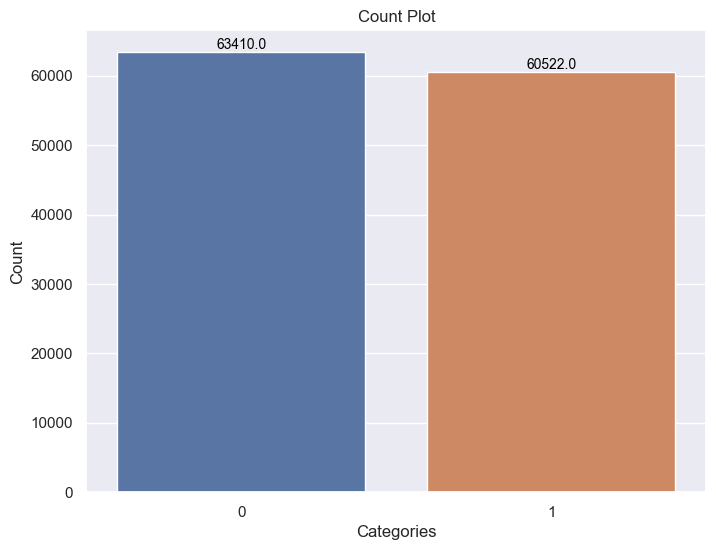

In [15]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.countplot(x='marker', data=dataset)
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [16]:
# Converting object type to int type

In [17]:
le= LabelEncoder()
dataset['marker']=  le.fit_transform(dataset['marker'])

In [18]:
dataset

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0,1
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0,1
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,125.277222,10.25416,-95.970431,10.07105,60.005,0.00,8.162755,0.026663,0,1
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,126.474704,9.33861,-97.253856,9.15550,60.003,0.00,8.135292,0.026595,0,1
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,126.595025,7.32440,-101.711468,7.14129,60.001,0.00,8.036023,0.033641,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123927,158.755146,132587.4518,38.789243,132537.3052,-81.222497,132662.6716,166.495806,293.52533,44.942809,301.94839,...,-82.906993,5.12708,-86.253066,4.76086,59.993,0.00,12.176983,-0.020530,0,0
123928,156.847196,131760.0339,36.875564,131709.8873,-83.113258,131810.1804,160.170352,305.79370,39.316364,311.65322,...,-52.924112,3.84531,-109.830280,3.47909,59.999,0.00,11.981359,-0.057703,0,0
123929,156.761253,131835.2537,36.789620,131835.2537,-83.204931,131910.4735,159.362481,308.54035,38.691840,313.30121,...,-54.522664,2.92976,0.000000,0.00000,59.999,0.00,11.975762,-0.049797,0,0
123930,156.709687,131885.4002,36.738054,131860.3269,-83.262227,131960.6200,158.932763,309.45590,38.313688,314.21676,...,-57.427560,3.11287,0.000000,0.00000,60.000,0.00,11.980219,-0.049228,0,0


In [19]:
dataset.dropna(inplace=True)

In [20]:
#Defining Dependent and independent variables

In [21]:
X=dataset.iloc[:,0:116]

In [22]:
X

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,485.24150,125.277222,10.25416,-95.970431,10.07105,60.005,0.00,8.162755,0.026663,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,484.69217,126.474704,9.33861,-97.253856,9.15550,60.003,0.00,8.135292,0.026595,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,485.60772,126.595025,7.32440,-101.711468,7.14129,60.001,0.00,8.036023,0.033641,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123927,158.755146,132587.4518,38.789243,132537.3052,-81.222497,132662.6716,166.495806,293.52533,44.942809,301.94839,...,318.24518,-82.906993,5.12708,-86.253066,4.76086,59.993,0.00,12.176983,-0.020530,0
123928,156.847196,131760.0339,36.875564,131709.8873,-83.113258,131810.1804,160.170352,305.79370,39.316364,311.65322,...,314.03365,-52.924112,3.84531,-109.830280,3.47909,59.999,0.00,11.981359,-0.057703,0
123929,156.761253,131835.2537,36.789620,131835.2537,-83.204931,131910.4735,159.362481,308.54035,38.691840,313.30121,...,313.85054,-54.522664,2.92976,0.000000,0.00000,59.999,0.00,11.975762,-0.049797,0
123930,156.709687,131885.4002,36.738054,131860.3269,-83.262227,131960.6200,158.932763,309.45590,38.313688,314.21676,...,313.66743,-57.427560,3.11287,0.000000,0.00000,60.000,0.00,11.980219,-0.049228,0


In [23]:
y=dataset.iloc[:,-1]

In [24]:
y

0         1
1         1
2         1
3         1
4         1
         ..
123927    0
123928    0
123929    0
123930    0
123931    0
Name: marker, Length: 123932, dtype: int64

In [25]:
#Datasplitting

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=77)

In [27]:
X_train.shape

(99145, 116)

In [28]:
X_test.shape

(24787, 116)

In [29]:
X_train.shape

(99145, 116)

In [30]:
X_test.shape

(24787, 116)

In [31]:
# Applying Feature Scaling

In [32]:
scaler = StandardScaler()
# Fit and transform the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
#Building a ML Model

In [34]:
labels=['Attack','Natural']

In [35]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [36]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# LGBMClassifier

Model loaded successfully.
LGBMClassifier Accuracy    : 75.26929438818736
LGBMClassifier Precision   : 75.54490878633631
LGBMClassifier Recall      : 77.04654387056775
LGBMClassifier FSCORE      : 74.98182553794135

 LGBMClassifier classification report
               precision    recall  f1-score   support

      Attack       0.85      0.63      0.72     12669
     Natural       0.70      0.88      0.78     12118

    accuracy                           0.75     24787
   macro avg       0.77      0.76      0.75     24787
weighted avg       0.77      0.75      0.75     24787



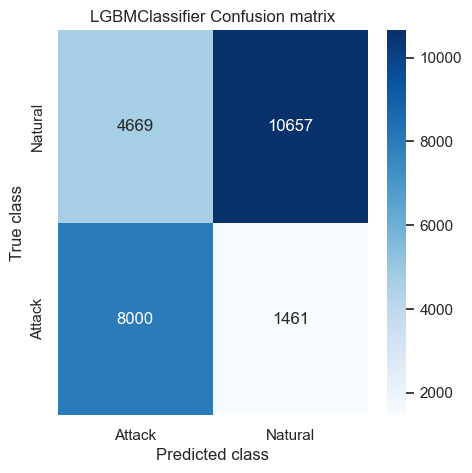

In [37]:
if os.path.exists('LGBMClassifier.pkl'):
    # Load the trained model from the file
    clf = joblib.load('LGBMClassifier.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("LGBMClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = LGBMClassifier()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'LGBMClassifier.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("LGBMClassifier", predict, y_test)

# RandomForestClassifier

Model loaded successfully.
BaggingClassifier Accuracy    : 94.00492193488522
BaggingClassifier Precision   : 93.96301694114226
BaggingClassifier Recall      : 94.08577532401159
BaggingClassifier FSCORE      : 93.99543980870794

 BaggingClassifier classification report
               precision    recall  f1-score   support

      Attack       0.93      0.96      0.94     12669
     Natural       0.95      0.92      0.94     12118

    accuracy                           0.94     24787
   macro avg       0.94      0.94      0.94     24787
weighted avg       0.94      0.94      0.94     24787



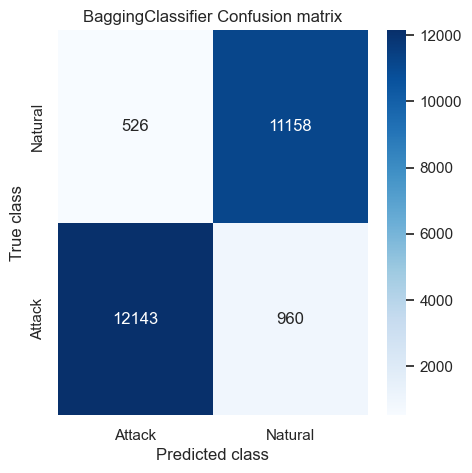

In [38]:
# Check if the model files exist
if os.path.exists('BaggingClassifier.pkl'):
    # Load the trained model from the file
    clf = joblib.load('BaggingClassifier.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("BaggingClassifier", predict, y_test)
else:
    clf = BaggingClassifier(n_estimators=50)
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'BaggingClassifier.pkl') 
    print("Model saved successfuly.")
    predict = clf.predict(X_test)
    calculateMetrics("BaggingClassifier", predict, y_test)

In [39]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["LGBMClassifier",'BaggingClassifier']
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,LGBMClassifier,75.544909,77.046544,74.981826,75.269294
1,BaggingClassifier,93.963017,94.085775,93.995440,94.004922


In [40]:
# prediction

In [41]:
test=pd.read_csv("test.csv")

In [42]:
test

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S
0,-69.379459,131057.9823,170.644020,130431.1505,50.649469,131133.2021,-71.814530,463.08519,166.415592,471.50825,...,463.165283,-17.877503,5.441666,114.590152,5.722046,60.000000,0.00,8.393829,0.033636,0
1,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,608.474530,119.301272,12.268370,-102.060972,11.719040,59.999000,0.01,6.341832,0.077897,0
2,-69.379459,131057.9823,170.644020,130431.1505,50.649469,131133.2021,-71.814530,463.08519,166.415592,471.50825,...,463.165283,-17.877503,5.441666,114.590152,5.722046,60.000000,0.00,8.393829,0.033636,0
3,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,485.058390,124.274546,10.254160,-95.454769,9.704830,60.005000,0.00,8.141328,0.027210,0
4,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,485.241500,125.277222,10.254160,-95.970431,10.071050,60.005000,0.00,8.162755,0.026663,0
5,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,484.692170,126.474704,9.338610,-97.253856,9.155500,60.003000,0.00,8.135292,0.026595,0
6,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,485.607720,126.595025,7.324400,-101.711468,7.141290,60.001000,0.00,8.036023,0.033641,0
7,74.547539,131057.9823,-45.441283,131032.9090,-165.441563,131133.2021,71.780153,486.52327,-50.179644,498.05920,...,487.255710,126.148118,6.408850,-98.972730,6.042630,60.000000,0.00,7.952983,0.043353,0
8,74.536080,131007.8358,-45.458471,131007.8358,-165.453023,131083.0556,71.671291,487.07260,-50.185373,497.87609,...,487.805040,127.718022,6.042630,-101.064025,6.042630,60.000000,0.00,7.947458,0.042901,0
9,74.501702,130982.7625,-45.475660,130957.6892,-165.475941,131057.9823,71.528051,487.98815,-50.191103,498.05920,...,488.354370,122.458270,5.859520,-97.144994,5.493300,60.000000,0.00,7.897930,0.048968,0


In [43]:
test1=scaler.fit_transform(test)
# Make predictions on the selected test data
predict = clf.predict(test1)
# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i])
        print("Row {}:************************************************** Attack".format(i))
    elif p==1:
        print(test.iloc[i])
        print("Row {}:************************************************** Normal".format(i))

R1-PA1:VH       -69.379459
R1-PM1:V     131057.982300
R1-PA2:VH       170.644020
R1-PM2:V     130431.150500
R1-PA3:VH        50.649469
                 ...      
R4:F             60.000000
R4:DF             0.000000
R4-PA:Z           8.393829
R4-PA:ZH          0.033636
R4:S              0.000000
Name: 0, Length: 116, dtype: float64
Row 0:************************************************** Attack
R1-PA1:VH        70.399324
R1-PM1:V     127673.090800
R1-PA2:VH       -49.572308
R1-PM2:V     127648.017600
R1-PA3:VH      -169.578319
                 ...      
R4:F             59.999000
R4:DF             0.010000
R4-PA:Z           6.341832
R4-PA:ZH          0.077897
R4:S              0.000000
Name: 1, Length: 116, dtype: float64
Row 1:************************************************** Attack
R1-PA1:VH       -69.379459
R1-PM1:V     131057.982300
R1-PA2:VH       170.644020
R1-PM2:V     130431.150500
R1-PA3:VH        50.649469
                 ...      
R4:F             60.000000
R4:DF          